In [12]:
from ipynb.fs.full.siamese_network import build_siamese_model
import ipynb.fs.full.config as config
import ipynb.fs.full.utils as utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.datasets import mnist
import numpy as np

In [4]:
print("[INFO] loading MNIST dataset...")
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX / 255.0
testX = testX / 255.0
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
print("[INFO] preparing positive and negative pairs...")
(pairTrain, labelTrain) = utils.make_pairs(trainX, trainY)
(pairTest, labelTest) = utils.make_pairs(testX, testY)

[INFO] loading MNIST dataset...
[INFO] preparing positive and negative pairs...


In [5]:
print("[INFO] building siamese network...")
imgA = Input(shape=config.IMG_SHAPE)
imgB = Input(shape=config.IMG_SHAPE)
featureExtractor = build_siamese_model(config.IMG_SHAPE)
featsA = featureExtractor(imgA)
featsB = featureExtractor(imgB)

[INFO] building siamese network...


In [6]:
distance = Lambda(utils.euclidean_distance)([featsA, featsB])
outputs = Dense(1, activation="sigmoid")(distance)
model = Model(inputs=[imgA, imgB], outputs=outputs)

In [7]:
print("[INFO] compiling model...")
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
print("[INFO] training model...")
history = model.fit([pairTrain[:, 0], pairTrain[:, 1]], labelTrain[:],
    validation_data=([pairTest[:, 0], pairTest[:, 1]], labelTest[:]),
    batch_size=config.BATCH_SIZE, 
    epochs=config.EPOCHS
)

[INFO] compiling model...
[INFO] training model...
Epoch 1/100
1875/1875 [==============================] - 368s 193ms/step - loss: 0.6933 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
1875/1875 [==============================] - 379s 202ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/100
1875/1875 [==============================] - 401s 214ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/100
1875/1875 [==============================] - 413s 220ms/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
1875/1875 [==============================] - 408s 218ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
1875/1875 [==============================] - 421s 225ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/100
1875/1875 [==============================] 

AttributeError: module 'ipynb.fs.full.config' has no attribute 'MODEL_PATH'

In [13]:
import os
IMG_SHAPE = (28, 28, 1)
BATCH_SIZE = 64
EPOCHS = 100
BASE_OUTPUT = "output"
MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "siamese_model"])
PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "plot.png"])

[INFO] saving siamese model...


INFO:tensorflow:Assets written to: output\siamese_model\assets


INFO:tensorflow:Assets written to: output\siamese_model\assets


[INFO] plotting training history...


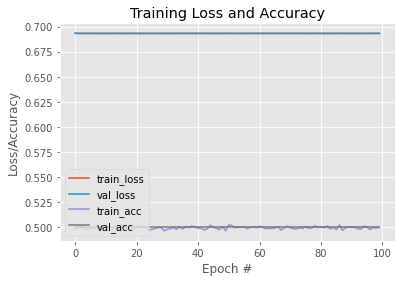

In [15]:
print("[INFO] saving siamese model...")
model.save(MODEL_PATH)
print("[INFO] plotting training history...")
utils.plot_training(history, PLOT_PATH)